In [1]:
import numpy as np

from QAOA.qaoa_src.Ansatz import *
import scipy as sc
from qiskit.visualization import plot_histogram

In [23]:
# Generating random graph 
n = 3
rng_seed = int(np.random.randint(0,2**31-1))
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
edge_list = generate_random_graph(nodes=n,weighted=True,w_min=1e-2,seed=rng_seed)

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(edge_list)


Best solution = [0 0 1] cost = -1.1945000000000001


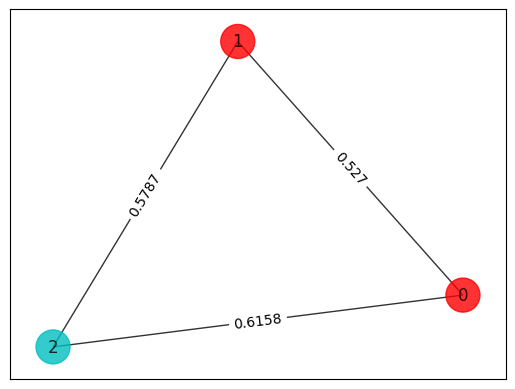

In [24]:
# Calculating optimal partition and plotting
best_cost, best_perm = qubo_min_cost_partition(nr_nodes=n,Q_mat=get_qubo(size=n,edges=edge_list))
colors = ["r" if best_perm[i] == 0 else "c" for i in range(n)]
print("\nBest solution = " + str(best_perm) + " cost = " + str(best_cost))
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)


In [25]:
# Defining instance of QAOA circuit
QAOA_objective = QAOAansatz(n_qubits=n,w_edges=edge_list)

In [26]:
layers=3

theta_i = np.random.uniform(low=-np.pi, high=np.pi, size=2*layers)
res = sc.optimize.minimize(fun=QAOA_objective.evaluate_circuit, x0=theta_i,method="COBYLA")
theta_f = res.x.tolist()

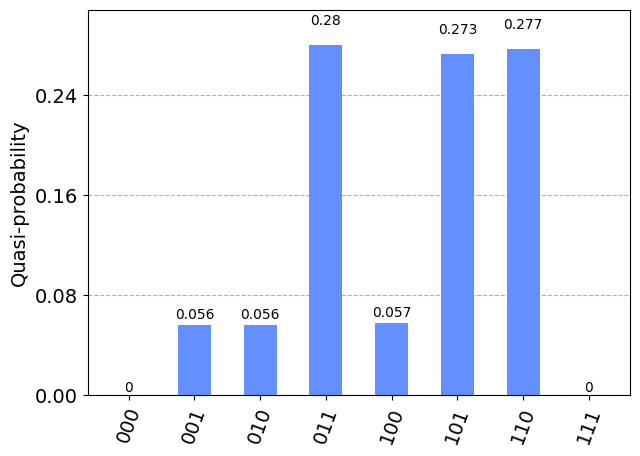

In [27]:
plot_histogram(QAOA_objective.set_circuit(theta=theta_f).get_state_probabilities())